In [1]:
import pandas as pd
import numpy as np
import csv


In [2]:
df = pd.read_csv("NEW_TRIMMED FOR MISSISSAUGA_Houses_Semi_Apt.csv")

### Remove Unnecessary Columns

In [3]:
# Remove unnecessary Columns
df.drop(['aptno','0'], axis=1, inplace=True)
df.head(10)

,mlsno,stname,area,askprice,inputdate,soldprice,solddate,type,style,bdrm,wshrm,house_condo,address
0,W3586797,Abana,Cooksville,649000.0,8/23/2016,728000.0,9/7/2016,Semi-Detached,Bungalow-Raised,6.0,5.0,house,"614 Abana Rd, Mississauga"
1,W3574781,Abana,Cooksville,549000.0,8/8/2016,552500.0,8/27/2016,Semi-Detached,2-Storey,4.0,3.0,house,"632 Abana Rd, Mississauga"
2,W3838271,Abana,Cooksville,649000.0,6/11/2017,650000.0,6/13/2017,Semi-Detached,Bungalow,3.0,2.0,house,"612 Abana Rd, Mississauga"
3,W3219937,Abana,Cooksville,519800.0,6/1/2015,499000.0,7/21/2015,Semi-Detached,Bungalow-Raised,3.0,2.0,house,"618 Abana Rd, Mississauga"
4,W3650999,Abana,Cooksville,549000.0,11/8/2016,563000.0,11/13/2016,Semi-Detached,Bungalow,3.0,2.0,house,"636 Abana Rd, Mississauga"
5,W3568034,Langworthy,Malton,1.0,8/1/2016,600000.0,8/4/2016,Semi-Detached,Backsplit 5,3.0,4.0,house,"7563 Langworthy Dr, Mississauga"
6,W3279065,Abana,Cooksville,598000.0,8/4/2015,596000.0,8/21/2015,Semi-Detached,Bungalow,3.0,4.0,house,"674 Abana Rd, Mississauga"
7,W3257911,Abana,Cooksville,536500.0,7/9/2015,517000.0,8/11/2015,Semi-Detached,2-Storey,4.0,3.0,house,"704 Abana Rd, Mississauga"
8,W3375919,Aberfoyle,Hurontario,675000.0,12/3/2015,670000.0,1/19/2016,Detached,2-Storey,4.0,4.0,house,"450 Aberfoyle Crt, Mississauga"
9,W3294200,Aberfoyle,Hurontario,568888.0,8/21/2015,546000.0,8/23/2015,Detached,2-Storey,3.0,2.0,house,"479 Aberfoyle Crt, Mississauga"


### Drop NaN Values from "Style" and "Area" Column

In [4]:
df.dropna(axis=0, subset=['style', 'area'], inplace=True)

In [5]:
df = df.replace({'area' : {'Streetsville':1, 'Cooksville':2,'Applewood':3,'Rathwood':4,'Hurontario':5,'Central Erin Mills':6,
              'Mineola':7,'Clarkson':8,'City Centre':9,'Meadowvale':10,'Malton':11,'Erin Mills':12,
              'Churchill Meadows':13,'Lisgar':14,'Port Credit':15,'East Credit':16,'Creditview':17,
              'Meadowvale Village':18,'Lorne Park':19,'Fairview':20,'Mississauga Valleys':21,'Erindale':22,
              'Sheridan':23,'Dixie':24,'Northeast':25,'Mavis-Erindale':26,'Gateway':27,'Lakeview':33,
              'Meadowvale Business Park':28,'Sheridan Park':29,'Southdown':30,'Port Credi':31,'City Centr':32,
              'Huttonville':34}})



In [6]:
df = df.replace({'type': {'Att/Row/Twnhouse':1, 'Condo Townhouse':1,'Det W/Com Elements':2,'Detached':2,'Semi-Det Condo':3,
               'Semi-Detached':3,'Comm Element Condo':4,'Condo Ap':4,'Condo Apartment':4,'Condo Apt':4,
               'Condo To':4,'Det Condo':4,'Leasehold Condo':4}})

df = df.replace({'type': ['Parking Space', 'Mobile/Trailer', 'Mobile/Tra','Co-Op Apt', 'Link','Duplex', 'Vacant Land', 
                           'Triplex','Cottage','Other','Multiplex','Store W/Apt/Offc']}, 999 )

# Un-Comment this if required
# df = df.replace({'type': ['Parking Space', 'Mobile/Trailer', 'Mobile/Tra','Co-Op Apt', 'Link','Duplex', 'Vacant Land', 
#                            'Triplex','Cottage','Other','Multiplex','Store W/Apt/Offc','Condo Townhouse',
#                           'Det W/Com Elements','Semi-Det Condo','Comm Element Condo','Condo Ap','Condo Apartment',
#                           'Condo Apt','Condo To','Det Condo','Leasehold Condo']}, 999 )


### Drop all 999 Values
- These are the House types other than what we defined previously

In [7]:
df.drop(index=999, columns='type')

,mlsno,stname,area,askprice,inputdate,soldprice,solddate,style,bdrm,wshrm,house_condo,address
0,W3586797,Abana,2,649000.0,8/23/2016,728000.0,9/7/2016,Bungalow-Raised,6.0,5.0,house,"614 Abana Rd, Mississauga"
1,W3574781,Abana,2,549000.0,8/8/2016,552500.0,8/27/2016,2-Storey,4.0,3.0,house,"632 Abana Rd, Mississauga"
2,W3838271,Abana,2,649000.0,6/11/2017,650000.0,6/13/2017,Bungalow,3.0,2.0,house,"612 Abana Rd, Mississauga"
3,W3219937,Abana,2,519800.0,6/1/2015,499000.0,7/21/2015,Bungalow-Raised,3.0,2.0,house,"618 Abana Rd, Mississauga"
4,W3650999,Abana,2,549000.0,11/8/2016,563000.0,11/13/2016,Bungalow,3.0,2.0,house,"636 Abana Rd, Mississauga"
5,W3568034,Langworthy,11,1.0,8/1/2016,600000.0,8/4/2016,Backsplit 5,3.0,4.0,house,"7563 Langworthy Dr, Mississauga"
6,W3279065,Abana,2,598000.0,8/4/2015,596000.0,8/21/2015,Bungalow,3.0,4.0,house,"674 Abana Rd, Mississauga"
7,W3257911,Abana,2,536500.0,7/9/2015,517000.0,8/11/2015,2-Storey,4.0,3.0,house,"704 Abana Rd, Mississauga"
8,W3375919,Aberfoyle,5,675000.0,12/3/2015,670000.0,1/19/2016,2-Storey,4.0,4.0,house,"450 Aberfoyle Crt, Mississauga"
9,W3294200,Aberfoyle,5,568888.0,8/21/2015,546000.0,8/23/2015,2-Storey,3.0,2.0,house,"479 Aberfoyle Crt, Mississauga"


### Make sure we only have the numeric values

In [8]:
print('Type Values: ', df.type.unique())
print('Area Values: ', df.area.unique())

Type Values:  [  3   2 999   4   1]
Area Values:  [ 2 11  5 16  9  4 24 23  3  8 21 25 10 12 33 22  6 18 20 13 32 19 14  1
  7 17 26 27 29 15 34 30 31 28]


In [9]:
df.head(10)

,mlsno,stname,area,askprice,inputdate,soldprice,solddate,type,style,bdrm,wshrm,house_condo,address
0,W3586797,Abana,2,649000.0,8/23/2016,728000.0,9/7/2016,3,Bungalow-Raised,6.0,5.0,house,"614 Abana Rd, Mississauga"
1,W3574781,Abana,2,549000.0,8/8/2016,552500.0,8/27/2016,3,2-Storey,4.0,3.0,house,"632 Abana Rd, Mississauga"
2,W3838271,Abana,2,649000.0,6/11/2017,650000.0,6/13/2017,3,Bungalow,3.0,2.0,house,"612 Abana Rd, Mississauga"
3,W3219937,Abana,2,519800.0,6/1/2015,499000.0,7/21/2015,3,Bungalow-Raised,3.0,2.0,house,"618 Abana Rd, Mississauga"
4,W3650999,Abana,2,549000.0,11/8/2016,563000.0,11/13/2016,3,Bungalow,3.0,2.0,house,"636 Abana Rd, Mississauga"
5,W3568034,Langworthy,11,1.0,8/1/2016,600000.0,8/4/2016,3,Backsplit 5,3.0,4.0,house,"7563 Langworthy Dr, Mississauga"
6,W3279065,Abana,2,598000.0,8/4/2015,596000.0,8/21/2015,3,Bungalow,3.0,4.0,house,"674 Abana Rd, Mississauga"
7,W3257911,Abana,2,536500.0,7/9/2015,517000.0,8/11/2015,3,2-Storey,4.0,3.0,house,"704 Abana Rd, Mississauga"
8,W3375919,Aberfoyle,5,675000.0,12/3/2015,670000.0,1/19/2016,2,2-Storey,4.0,4.0,house,"450 Aberfoyle Crt, Mississauga"
9,W3294200,Aberfoyle,5,568888.0,8/21/2015,546000.0,8/23/2015,2,2-Storey,3.0,2.0,house,"479 Aberfoyle Crt, Mississauga"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22444 entries, 0 to 22471
Data columns (total 13 columns):
mlsno          22444 non-null object
stname         22444 non-null object
area           22444 non-null int64
askprice       22444 non-null float64
inputdate      22444 non-null object
soldprice      22444 non-null float64
solddate       22444 non-null object
type           22444 non-null int64
style          22444 non-null object
bdrm           22444 non-null float64
wshrm          22444 non-null float64
house_condo    22444 non-null object
address        22444 non-null object
dtypes: float64(4), int64(2), object(7)
memory usage: 3.0+ MB


In [11]:
df.area.plot(kind='hist', title='Sold Price')

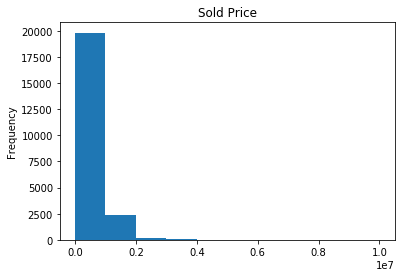

In [12]:
df.soldprice.plot(kind='hist', title='Sold Price')

In [13]:
df.stname.unique()

array(['Abana', 'Langworthy', 'Aberfoyle', ..., 'Yorkshire', 'Yorktown',
       'Zinna'], dtype=object)

In [14]:
list_of_street = df.stname.unique()

In [15]:
for x in list_of_street:
...     print(x, end='; ')

Abana; Langworthy; Aberfoyle; Abington; Abruz; Sherwood Mills; Enfield; Rathburn; Webb; Kariya; Absolute; Duke Of York; Dundas; Dundas 11 Orchard; Dundas 15 3rd West; Dundas E. 9th Ave; Woking; Derry; Bloor; Bonnymeade; Bonnymede; Derry Road East; Roche; Queen Frederica; Lolita; Williamsport; Agnes; Tomken; Battleford; Constitution; Glen Erin; Confederation; Bristol; Lakeshore; The Credit Woodlands; Kirwin; Morning Star; Stainton; Kaneff; Kimbermount; Tucana; King; Shipp; Trailwood; Hillcrest; Fairview; Aquitaine; Hurontario; Prince Of Wales; Caven; Cedarglen; Kingsbridge Garden; Cornerbrook; Erin Centre; Goreway; Battlford; Elm; Forestwood; Shoreline; Winston Churchill; Erin Mills; Square One; Living Arts; Acala; Achill; Acorn; Acumen; Adamson; Adena; Adobe; Advent; Africa; Agean; Agora; Ajyn; Alana Glen; Albertson; Albina; Aldercrest; Aldermead; Alderwood; Aldo; Alexandra; Alexis; Alfresco; Algarve; Alicante; Allcroft; Alliance; Allspice; Almira; Alpaca; Alpha Mills; Alphonse; Alta; 

; Polaris; Polesden; Pollard; Polo; Poltava; Pomona; Pond; Ponderosa; Priory; Pondview; Ponytrail; Poplar; Portsmouth; Portway; Positano; Powderhorn; Praire; Prairie; Premium; Preservation; President; Preston Manor; Preston Meadow; Prestonwood; Price; Prince Albert; Prince Geaorge; Prince George; Prince John; Redfox; Sherwoodtown; Sigsbee; Wildfern; Tassel; Tenth Line; Princelea; Princess; Pringle; Privet; Promenade; Promontory; Prosper; Proudfoot; Proverbs; Purnell; Pyramid; Quail's Run; Quaker Hill; Quartermain; Sandgate; Queen Victoria; Queen West; Queens; Queensborough; Queensbridge; Queenston; Queensway; Queensway West; Quest; Questman; Questman Hollow; Quetta; Quiet Creek; Quill; Quinpool; Rackus; Radcliffe; Radisson; Radley; Raftsman Cove; Raglan; Rainberry; Rainbow; Raindance; Rainpark; Raintree; Rainwater; Raleigh; Rallymaster; Rambo; Ramonet; Randolf; Randor; Rapallo; Raphael; Scarboro; Tamar; Spring Garden; Widemarr; Aquitane; Folkway Dr 69; Reiss; Swanage; The College; Zinn

In [16]:
list_of_street.size

2702